In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
input_ordner = "data/Bundesliga/modified/GW"

In [3]:
gameweek = 1
team = "Leverkusen"

directory = os.listdir(input_ordner + str(gameweek))

for fname in directory:
    if team in fname:
        if "EventData" in fname:
            event_df = pd.read_csv(input_ordner + str(gameweek) + "/" + fname)
        elif "PlayerData" in fname:
            player_df = pd.read_csv(input_ordner + str(gameweek) + "/" + fname)

In [18]:
def plot_events(events, event_type="Passes", team_name=None, player_name=None, title=None):
    """
    Plots events on a football pitch.

    Parameters:
    - events (DataFrame): The DataFrame containing event data with columns 'x', 'y', 'endX', 'endY'.
    - event_type (str): The type of event to plot (e.g., "Passes", "Shots").
    - team_name (str, optional): The name of the team to include in the title.
    - player_name (str, optional): The name of the player to include in the title.
    - title (str, optional): Custom title for the plot. Defaults to "Events".
    
    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=(10, 7))
    
    # Customize markers and labels based on event type
    start_label = f"{event_type} Start"
    end_label = f"{event_type} End"
    
    if event_type.lower() == "shots":
        start_color = "green"
        end_color = "orange"
    elif event_type.lower() == "tackles":
        start_color = "purple"
        end_color = "yellow"
    else:  # Default to passes
        start_color = "blue"
        end_color = "red"
    
    # Plot start and end points
    plt.scatter(events['x'], events['y'], alpha=0.6, c=start_color, label=start_label)
    plt.scatter(events['endX'], events['endY'], alpha=0.6, c=end_color, label=end_label)
    
    # plotting zone lines
    x_thresholds = [0, 16.67, 33.33, 50, 66.67, 83.33, 100]  # 6 columns
    y_thresholds = [0, 33.33, 66.67, 100]      
    for x in x_thresholds:
        plt.plot([x, x], [0, 100], color='black', alpha=0.3, linewidth=0.5)
    for y in y_thresholds:
        plt.plot([0, 100], [y, y], color='black', alpha=0.3, linewidth=0.5)
    
    # Plot trajectories if end coordinates are available
    if 'endX' in events.columns and 'endY' in events.columns:
        for _, row in events.iterrows():
            plt.plot([row['x'], row['endX']], [row['y'], row['endY']], color='gray', alpha=0.3, linewidth=0.5)
    
    # Set plot aesthetics
    if title is None:
        title = event_type
        if team_name:
            title += f" by {team_name}"
        if player_name:
            title += f" ({player_name})"
    
    plt.title(title, fontsize=14)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.xlim(0, 100)  # Assuming the pitch is scaled to 100x100
    plt.ylim(0, 100)
    plt.gca().invert_yaxis()  # Invert y-axis to match football pitch view
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

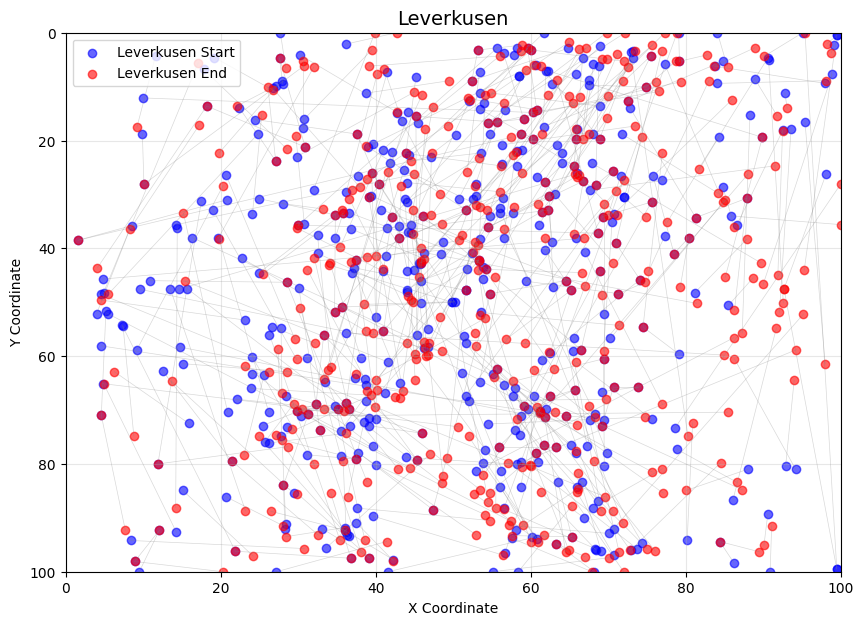

In [5]:
# Filter for pass events (if 'type' contains passes) and one team
team_name = "Leverkusen"  # Replace with the desired team name
passes_leverkusen = event_df[(event_df['teamName'] == team_name) & (event_df['type'] == "Pass")]


plot_events(passes_leverkusen, team_name)

In [23]:
def map_coordinates_to_18_zones(x, y):
    """
    Maps the x and y coordinates to one of 18 zones on the football field.
    
    The field is divided into 6 vertical zones (columns) and 3 horizontal zones (rows):
        - Zones are labeled Zone1 to Zone18, numbered from top-left to bottom-right.
    
    Args:
        x (float): The x-coordinate (0-100 range).
        y (float): The y-coordinate (0-100 range).
    
    Returns:
        str: The zone label (Zone1 to Zone18).
    """
    # Define thresholds for dividing the field into 6 vertical and 3 horizontal sections
    x_thresholds = [0, 16.67, 33.33, 50, 66.67, 83.33, 100]  # 6 columns
    y_thresholds = [0, 33.33, 66.67, 100]                    # 3 rows

    # Determine the column (x_zone) and row (y_zone) based on thresholds
    x_zone = sum([x > t for t in x_thresholds])
    y_zone = sum([y > t for t in y_thresholds])

    # Calculate the zone number (1-18) based on x_zone and y_zone
    # subtract 1 from y_zone to start numbering from 0 then multiply by 6 (as 1 y_zone is 6 x_zones) and then add x_zone
    return f"Zone {(y_zone - 1) * 6 + x_zone}"
    

In [22]:
print(player_394786.iloc[0][['x', 'y']])

map_coordinates_to_18_zones(player_394786.iloc[0]['x'], player_394786.iloc[0]['y'])

x    78.5
y    41.0
Name: 42, dtype: object
5 2


'Zone 11'

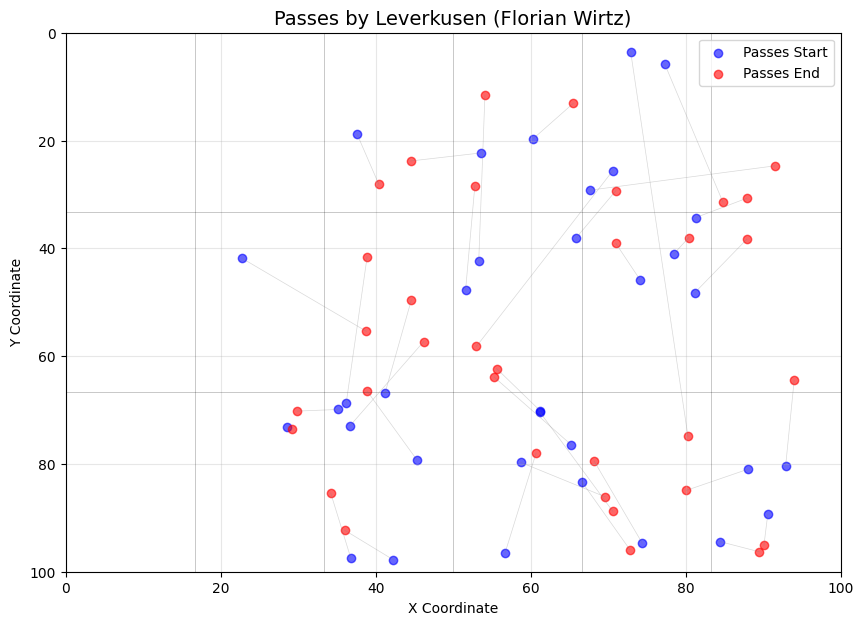

In [19]:
player_394786 = event_df[(event_df['teamName'] == "Leverkusen") & (event_df['playerId'] == 394786) & (event_df['type'] == "Pass")]
plot_events(player_394786, team_name="Leverkusen", player_name="Florian Wirtz")


Leverkusen had 23 take-ons in the match.


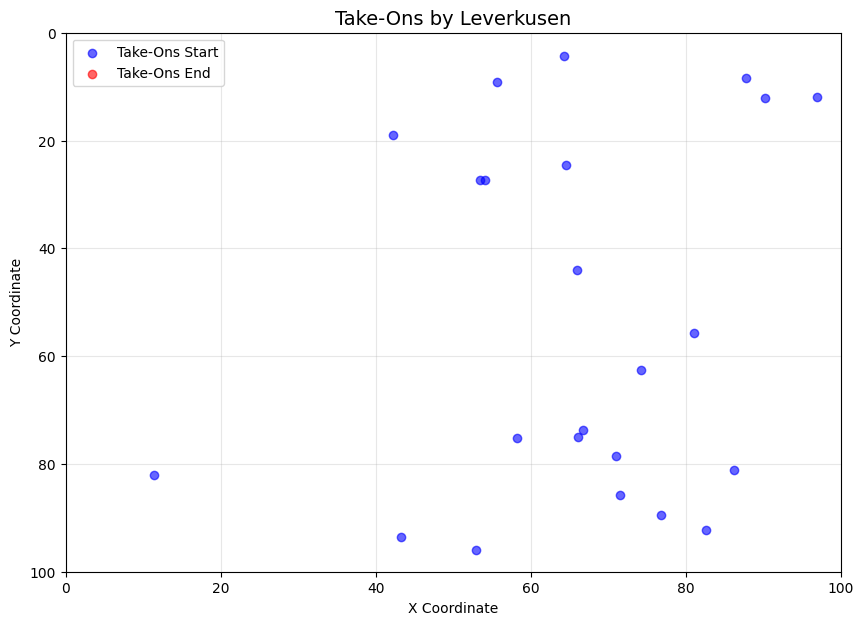

In [7]:
take_ons = event_df[(event_df['teamName'] == "Leverkusen") & (event_df['type'] == "TakeOn")]
print(f"Leverkusen had {len(take_ons)} take-ons in the match.")
plot_events(take_ons, event_type="Take-Ons", team_name="Leverkusen")

Florian Wirtz had 4 take-ons in the match.


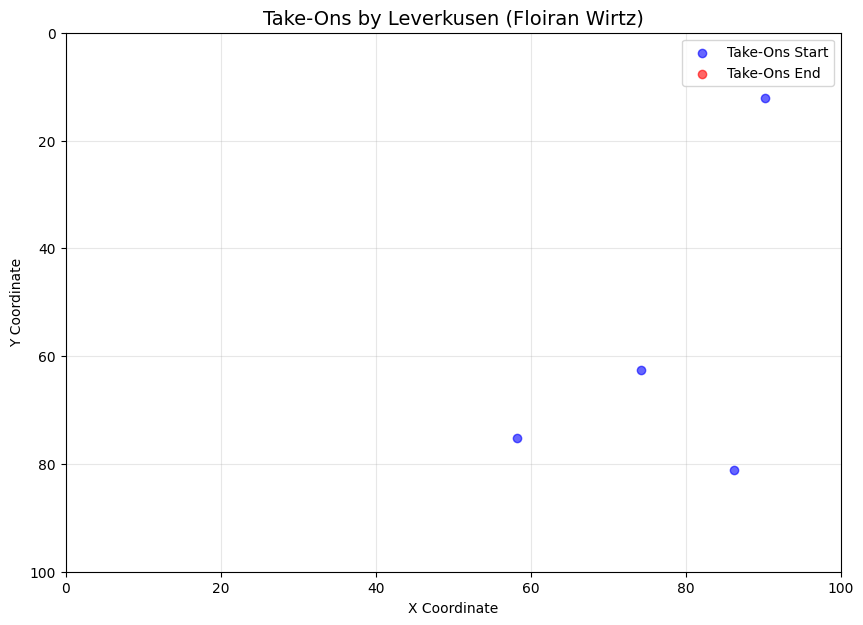

In [8]:
take_ons = event_df[(event_df['teamName'] == "Leverkusen") & (event_df["playerId"]== 394786) & (event_df['type'] == "TakeOn")]
print(f"Florian Wirtz had {len(take_ons)} take-ons in the match.")
plot_events(take_ons, event_type="Take-Ons", player_name="Floiran Wirtz", team_name="Leverkusen")

In [9]:
player_df[player_df["isManOfTheMatch"]==True]

,Unnamed: 0,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
8,8,115163,7,Jonas Hofmann,AMC,176,73,32,True,True,home,"{'possession': {'2': 1.0, '3': 1.0, '4': 1.0, ...",399385.0,"{'value': 2, 'displayName': 'SecondHalf'}",92.0,NaN,NaN,NaN,36


Jonas Hofmann had 3 take-ons in the match.


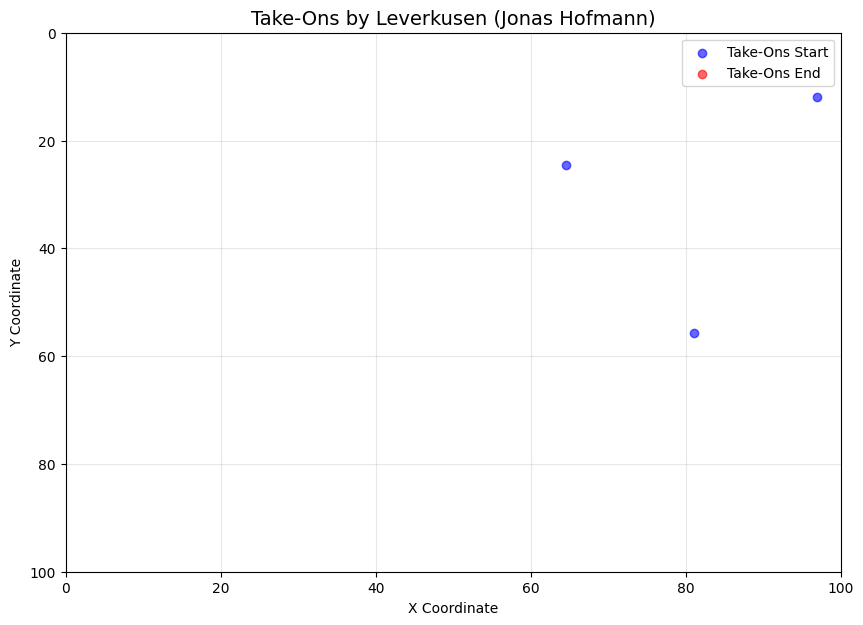

In [10]:
take_ons = event_df[(event_df['teamName'] == "Leverkusen") & (event_df["playerId"]== 115163) & (event_df['type'] == "TakeOn")]
print(f"Jonas Hofmann had {len(take_ons)} take-ons in the match.")
plot_events(take_ons, event_type="Take-Ons", player_name="Jonas Hofmann", team_name="Leverkusen")

In [11]:
import seaborn as sns

def plot_player_event_heatmap(events, player_name=None, team_name=None, title=None, pitch_size=(100, 100)):
    """
    Plots a heatmap-like visualization of all events from a specific player.

    Parameters:
    - events (DataFrame): The DataFrame containing event data with columns 'x', 'y'.
    - player_name (str, optional): The name of the player to include in the title.
    - team_name (str, optional): The name of the team to include in the title.
    - title (str, optional): Custom title for the plot. Defaults to "Event Heatmap".
    - pitch_size (tuple): The dimensions of the pitch (default is (100, 100)).
    
    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot heatmap using seaborn's kdeplot
    sns.kdeplot(
        x=events['x'], y=events['y'],
        fill=True, cmap="coolwarm", alpha=0.7, levels=100, bw_adjust=0.5
    )
    
    # Set pitch boundaries
    plt.xlim(0, pitch_size[0])
    plt.ylim(0, pitch_size[1])
    plt.gca().invert_yaxis()  # Invert y-axis to match football pitch view
    
    # Title customization
    if title is None:
        title = "Event Heatmap"
        if player_name:
            title += f" for {player_name}"
        if team_name:
            title += f" ({team_name})"
    plt.title(title, fontsize=14)
    
    # Labels and pitch aesthetics
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(alpha=0.3)
    plt.show()

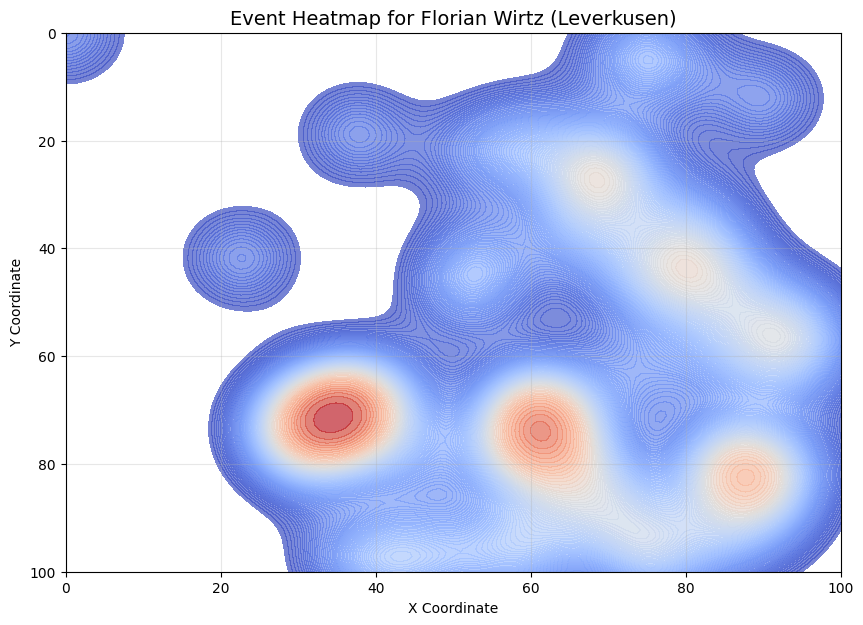

In [12]:
events_394786 = event_df[event_df['playerId'] == 394786]  # Florian Wirtz's ID
plot_player_event_heatmap(events_394786, player_name="Florian Wirtz", team_name="Leverkusen")


In [ ]:
def player_stats(player_df, id):
    """
    Extracts the stats of a player from the player DataFrame.
    Parameters:
    - player_df (DataFrame): The DataFrame containing player data.
    - id (int): The player ID.
    Returns:
    - dict: The player's stats as a dictionary.
    """
    
    # Extracts the player's stats
    stats = player_df[player_df["playerId"]==id]['stats'].values
    
    # Converts the string representation of the dictionary to a Python dictionary
    return ast.literal_eval(stats[0])

def player_rating(player_df, id):
    """
    Extracts the rating of a player from the player DataFrame.
    Parameters:
    - player_df (DataFrame): The DataFrame containing player data.
    - id (int): The player ID.
    Returns:
    - float: The player's rating.
    """
    ratings = player_stats(player_df, id)['ratings']
    
    # Returns the last rating in the dictionary
    return ratings[list(ratings.keys())[-1]]    


In [32]:
player_stats(player_df, 394786)

{'possession': {'1': 1.0,
  '3': 1.0,
  '4': 1.0,
  '6': 1.0,
  '7': 1.0,
  '11': 1.0,
  '13': 2.0,
  '15': 1.0,
  '17': 1.0,
  '19': 4.0,
  '22': 2.0,
  '30': 1.0,
  '33': 1.0,
  '35': 2.0,
  '37': 1.0,
  '40': 1.0,
  '42': 2.0,
  '44': 2.0,
  '45': 1.0,
  '47': 1.0,
  '49': 1.0,
  '51': 1.0,
  '55': 1.0,
  '62': 2.0,
  '73': 1.0},
 'ratings': {'0': 6.0,
  '1': 6.0,
  '3': 5.99,
  '4': 5.98,
  '6': 5.95,
  '7': 6.11,
  '11': 6.1,
  '13': 6.1,
  '15': 6.17,
  '17': 6.18,
  '19': 6.18,
  '22': 6.19,
  '23': 6.32,
  '30': 6.33,
  '33': 6.33,
  '34': 6.46,
  '35': 6.47,
  '37': 6.47,
  '38': 6.37,
  '40': 6.36,
  '42': 6.34,
  '44': 6.34,
  '45': 6.33,
  '47': 6.34,
  '49': 6.34,
  '50': 6.29,
  '51': 6.33,
  '55': 6.33,
  '57': 6.32,
  '62': 6.31,
  '64': 6.33,
  '67': 7.43,
  '73': 7.42,
  '74': 7.32},
 'shotsTotal': {'51': 1.0, '67': 1.0},
 'shotsOnTarget': {'51': 1.0, '67': 1.0},
 'touches': {'1': 1.0,
  '3': 2.0,
  '4': 1.0,
  '6': 2.0,
  '7': 2.0,
  '11': 3.0,
  '13': 2.0,
  '15': 1

In [31]:
player_stats(player_df, 394786).keys()

dict_keys(['possession', 'ratings', 'shotsTotal', 'shotsOnTarget', 'touches', 'passesTotal', 'passesAccurate', 'passSuccess', 'aerialsTotal', 'aerialsWon', 'aerialSuccess', 'offensiveAerials', 'defensiveAerials', 'cornersTotal', 'foulsCommited', 'dribblesWon', 'dribblesAttempted', 'dribblesLost', 'dribbleSuccess', 'dispossessed'])

In [28]:
# The final player rating of player with ID 394786
player_rating(player_df, 394786)

7.32